# CoefficientFunctions (Unit 1.2)

In NGSolve, CoefficientFunctions are representations of functions defined on the computational domain $\Omega$. Examples are expressions of coordinate variables $x,y,z$ and functions that are constant on subdomains. Much of the magic behind the seamless integration of NGSolve with python lies in CoefficientFunctions. This tutorial introduces you to them.

In [2]:
import netgen.gui
%gui tk
from ngsolve import *
from netgen.geom2d import unit_square

mesh = Mesh(unit_square.GenerateMesh(maxh=0.2))

#### Define a function

In [3]:
myfunc = x*(1-x)
myfunc

In [4]:
x        # This is a built-in CoefficientFunction


#### Draw the function

Use the mesh to visualize the function.


In [3]:
Draw(myfunc, mesh, 'firstfunc')

In [4]:
help(Draw)

Help on built-in function Draw in module ngsolve.solve:

Draw(...) method of builtins.PyCapsule instance
    Draw(*args, **kwargs)
    Overloaded function.
    
    1. Draw(arg0: ngsolve.comp.Mesh) -> None
    
    2. Draw(gf: ngsolve.comp.GridFunction, sd: int=2, autoscale: bool=True, min: float=0.0, max: float=1.0) -> None
    
    3. Draw(cf: ngsolve.fem.CoefficientFunction, mesh: ngsolve.comp.Mesh, name: str, sd: int=2, autoscale: bool=True, min: float=0.0, max: float=1.0, draw_vol: bool=True, draw_surf: bool=True) -> None



#### Evaluate the function

In [5]:
mip = mesh(0.6,0.6)
myfunc(mip)

0.24



Note that ```myfunc(0.2,0.3)``` does not work: You need to give points in the form of MappedIntegrationPoints like mip above. The mesh knows how to produce them.
#### Examining functions on sets of points


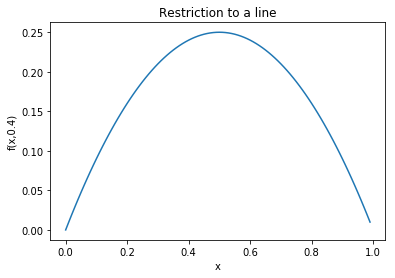

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
xs = [.01*i for i in range(100)]
ys = [myfunc(mesh(x, .4)) for x in xs]
plt.plot(xs,ys)
plt.title("Restriction to a line")
plt.ylabel("f(x,0.4)")
plt.xlabel("x")
plt.show()



#### Interpolate a CoefficientFunction

We may Set a GridFunction using a CoefficientFunction:


In [8]:
fes = H1(mesh, order=1)
u = GridFunction(fes)
u.Set(myfunc)
Draw(u) # Cf.: Draw(myfunc, mesh, "firstfun")

- The Set method interpolates myfunc to obtain the grid function u.

- Set does an Oswald-type interpolation as follows:

   - It first zeros the grid function;
   - It then projects myfunc in $L_2$ on each mesh element;
   - It then averages dofs on element interfaces for conformity.

#### Integrate a CoefficientFunction

We can numerically integrate the function using the mesh:


In [9]:
Integrate(myfunc, mesh)

0.166666666666666


#### Differentiate

There is no facility to directly differentiate a CoefficientFunction. But you can interpolate it into a GridFunction and then differentiate the GridFunction.


In [ ]:
u.Set(myfunc)
gradu = grad(u)
gradu[0]


In [12]:
Draw(gradu[0], mesh, 'dx_firstfun')



Obviously the accuracy of this process can be improved for smooth functions by using higher order finite element spaces.
#### Vector-valued CoefficientFunctions

Above, gradu provided an example of a vector-valued coefficient function. To visualize it, click on ```Visual``` menu in GUI and check ```Draw Surface Vectors```.


In [13]:
Draw(gradu, mesh, 'grad(firstfun)')

You can also define vector coefficient expressions directly:

In [14]:
vecfun = CoefficientFunction((-y, sin(x)))
Draw(vecfun, mesh, 'vecfun')


#### Expression tree

Internally, coefficient functions are implemented as an expression tree made from building blocks like x, y, sin, etc., and arithmetic operations.

E.g., the expression tree for myfunc = x*(1-x) looks like this:


In [15]:
print(myfunc)

coef binary operation '*', real
  coef coordinate x, real
  coef binary operation '-', real
    coef N5ngfem27ConstantCoefficientFunctionE, real
    coef coordinate x, real

